In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [2]:
df = pd.read_excel("data_set_label.xlsx")
df.iloc[0:5]

,image,joint,percent,Group
0,1,pp,0.00,1
1,2,pp,0.25,1
2,3,pp,0.50,1
3,4,pp,0.75,1
4,5,pp,1.00,1


In [3]:
#224*224*3 = 150528
#350*350 = 122500 
x = np.zeros((1 , 50 , 50))

for i in range(1 , 51, 1):
    for j in range(1, 51 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img , (1 , 50 , 50))
            if(i == 1 and j==2):
                x[0] = img
            else:
                x = np.append(x , img , axis=0)
for i in range(51 , 101 , 1):
    for j in range(51, 101 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img , (1 , 50 , 50))
            if(i == 1 and j==2):
                x[0] = img
            else:
                x = np.append(x , img , axis=0)
for i in range(101 , 151 , 1):
    for j in range(101, 151 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img , (1 , 50 , 50))
            if(i == 1 and j==2):
                x[0] = img
            else:
                x = np.append(x , img , axis=0)
for i in range(151 , 201 , 1):
    for j in range(151, 201 , 1):
        if(df['Group'][i-1] == df["Group"][j-1] and i!=j):
            file_name = str(i)+"-"+str(j)+".png"
            img = imread(file_name)
            img = resize(img , (1 , 50 , 50))
            if(i == 1 and j==2):
                x[0] = img
            else:
                x = np.append(x , img , axis=0)

In [4]:
x.shape

(800, 50, 50)

In [5]:
df_pp = pd.read_csv("pp_labels.csv")
y_pp = np.asarray(df_pp['joint'])
df_no = pd.read_csv("no_labels.csv")
y_no = np.asarray(df_no['joint'])
df_p = pd.read_csv("p_labels.csv")
y_p = np.asarray(df_p['joint'])
df_r = pd.read_csv("r_labels.csv")
y_r = np.asarray(df_r['joint'])
y = np.append(y_pp , y_no)
y = np.append(y , y_p)
y = np.append(y , y_r)
#changing the labels from string to categorical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(y)
y.shape

(800,)

In [6]:
print("pp is"  , Y[0])
print("no joint is" , Y[201])
print("p joint is" , Y[401])
print("r joint is" , Y[601])


pp is 2
no joint is 0
p joint is 1
r joint is 3


In [7]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

pca = PCA(n_components=50)
svd = TruncatedSVD(n_components=50)

In [8]:
x_1 = []
x_2 = []
x_3 = []
for i in x:
    x_1.append(pca.fit_transform(i))
    x_2.append(svd.fit_transform(i))
    x_3.append(i.reshape(1 , -1))

In [9]:
print(len(x_1))
print(len(x_2))
print(len(x_3))

800
800
800


# NO PCA

In [48]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_3 , Y , shuffle=True , random_state=1 )

In [49]:
x_train = np.reshape(x_train , (len(x_train), -1))
x_test = np.reshape(x_test , (len(x_test) , -1))

0.6866666666666666
0.25666666666666665
0.97
0.605


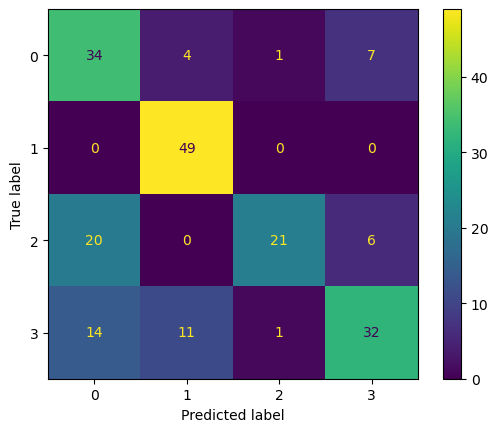

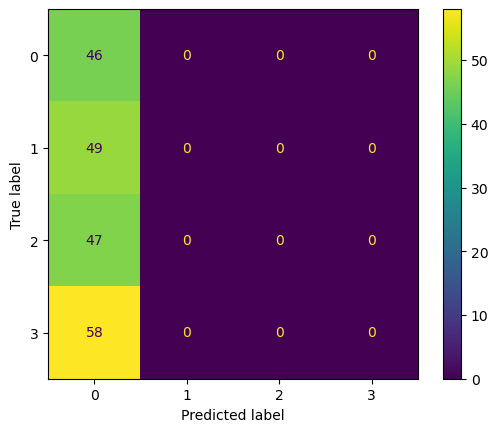

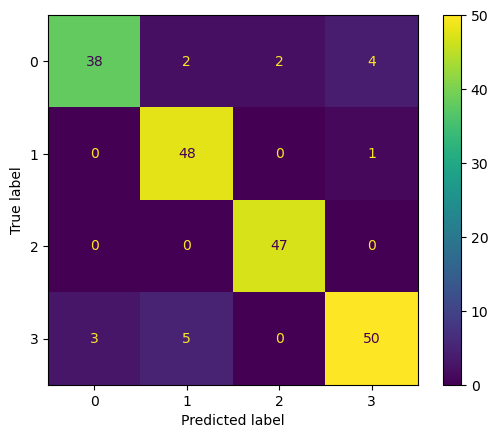

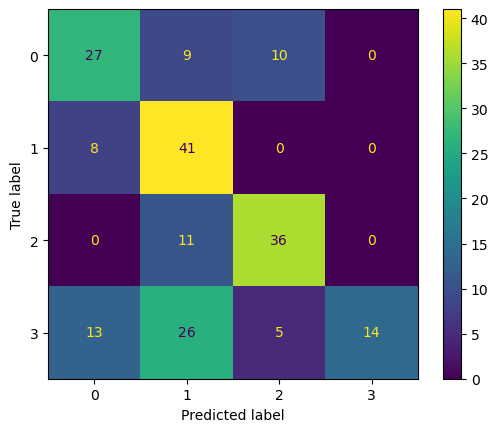

In [50]:
from sklearn import svm
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay

svc = svm.SVC(kernel="linear")

train = svc.fit(x_train , y_train)
pred_l_pca = train.predict(x_test)
print(train.score(x_train , y_train))

svc = svm.SVC(kernel='sigmoid')
train = svc.fit(x_train , y_train)
pred_sig_pca = train.predict(x_test)
print(train.score(x_train , y_train))

svc = svm.SVC(kernel='poly')
train = svc.fit(x_train , y_train)
pred_poly_pca = train.predict(x_test)
print(train.score(x_train , y_train))

svc = svm.SVC(kernel='rbf')
train = svc.fit(x_train , y_train)
pred_rbf_pca = train.predict(x_test)
print(train.score(x_train , y_train))

A = ConfusionMatrixDisplay.from_predictions(y_test , pred_l_pca)
plt.show()
B = ConfusionMatrixDisplay.from_predictions(y_test , pred_sig_pca)
plt.show()
C = ConfusionMatrixDisplay.from_predictions(y_test , pred_poly_pca)
plt.show()
D = ConfusionMatrixDisplay.from_predictions(y_test , pred_rbf_pca)



In [51]:
print(classification_report(y_test , pred_poly_pca))
print(classification_report(y_test , pred_rbf_pca))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.87      0.98      0.92        49
           2       0.96      1.00      0.98        47
           3       0.91      0.86      0.88        58

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.91       200

              precision    recall  f1-score   support

           0       0.56      0.59      0.57        46
           1       0.47      0.84      0.60        49
           2       0.71      0.77      0.73        47
           3       1.00      0.24      0.39        58

    accuracy                           0.59       200
   macro avg       0.68      0.61      0.58       200
weighted avg       0.70      0.59      0.57       200



In [47]:
print(classification_report(y_test , pred_l_pca))
print(classification_report(y_test , pred_sig_pca))

              precision    recall  f1-score   support

           0       0.50      0.74      0.60        46
           1       0.77      1.00      0.87        49
           2       0.91      0.45      0.60        47
           3       0.71      0.55      0.62        58

    accuracy                           0.68       200
   macro avg       0.72      0.68      0.67       200
weighted avg       0.72      0.68      0.67       200

              precision    recall  f1-score   support

           0       0.23      1.00      0.37        46
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.09       200
weighted avg       0.05      0.23      0.09       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using PCA as data reduction

In [25]:


x_train , x_test , y_train , y_test = train_test_split(x_1 , Y , shuffle=True , random_state=1 )

In [26]:
x_train = np.reshape(x_train , (len(x_train), -1))
x_test = np.reshape(x_test , (len(x_test) , -1))

In [27]:


svc = svm.SVC(kernel="linear")

train = svc.fit(x_train , y_train)
pred_l_pca = train.predict(x_test)
print(train.score(x_train , y_train))

0.6066666666666667


In [28]:
svc = svm.SVC(kernel='sigmoid')
train = svc.fit(x_train , y_train)
pred_sig_pca = train.predict(x_test)
print(train.score(x_train , y_train))

0.30666666666666664


In [29]:
svc = svm.SVC(kernel='poly')
train = svc.fit(x_train , y_train)
pred_poly_pca = train.predict(x_test)
print(train.score(x_train , y_train))

0.63


In [30]:
svc = svm.SVC(kernel='rbf')
train = svc.fit(x_train , y_train)
pred_rbf_pca = train.predict(x_test)
print(train.score(x_train , y_train))

0.7716666666666666


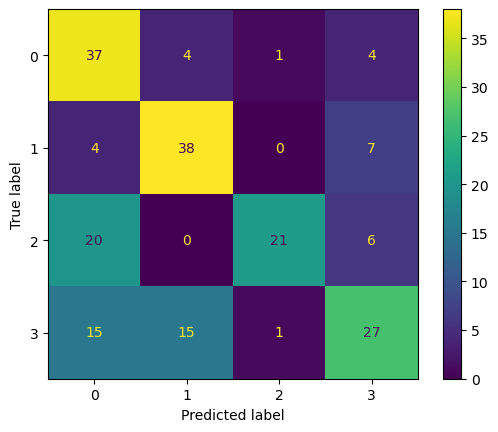

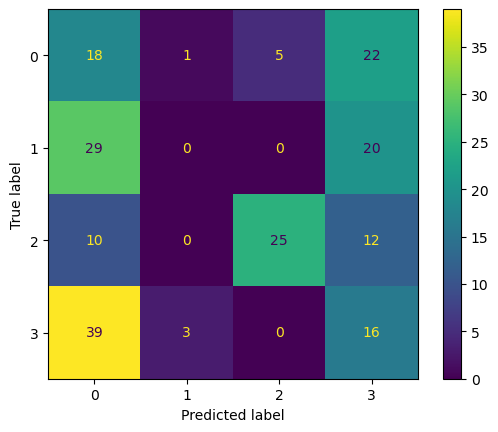

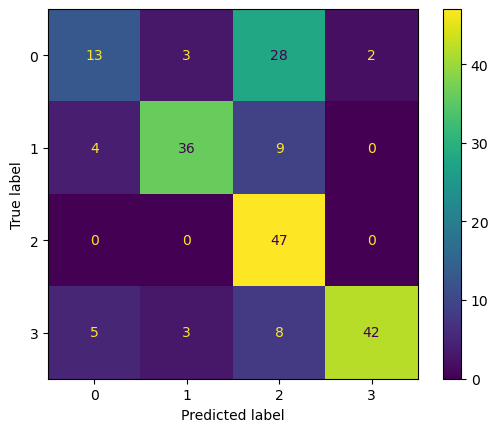

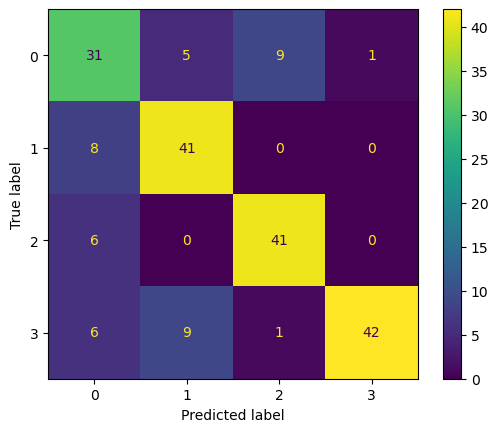

In [31]:
A = ConfusionMatrixDisplay.from_predictions(y_test , pred_l_pca)
plt.show()
B = ConfusionMatrixDisplay.from_predictions(y_test , pred_sig_pca)
plt.show()
C = ConfusionMatrixDisplay.from_predictions(y_test , pred_poly_pca)
plt.show()
D = ConfusionMatrixDisplay.from_predictions(y_test , pred_rbf_pca)

In [34]:
print(classification_report(y_test , pred_l_pca))
print(classification_report(y_test , pred_sig_pca))


              precision    recall  f1-score   support

           0       0.49      0.80      0.61        46
           1       0.67      0.78      0.72        49
           2       0.91      0.45      0.60        47
           3       0.61      0.47      0.53        58

    accuracy                           0.61       200
   macro avg       0.67      0.62      0.61       200
weighted avg       0.67      0.61      0.61       200

              precision    recall  f1-score   support

           0       0.19      0.39      0.25        46
           1       0.00      0.00      0.00        49
           2       0.83      0.53      0.65        47
           3       0.23      0.28      0.25        58

    accuracy                           0.29       200
   macro avg       0.31      0.30      0.29       200
weighted avg       0.31      0.29      0.28       200



In [33]:
print(classification_report(y_test , pred_poly_pca))
print(classification_report(y_test , pred_rbf_pca))

              precision    recall  f1-score   support

           0       0.59      0.28      0.38        46
           1       0.86      0.73      0.79        49
           2       0.51      1.00      0.68        47
           3       0.95      0.72      0.82        58

    accuracy                           0.69       200
   macro avg       0.73      0.69      0.67       200
weighted avg       0.74      0.69      0.68       200

              precision    recall  f1-score   support

           0       0.61      0.67      0.64        46
           1       0.75      0.84      0.79        49
           2       0.80      0.87      0.84        47
           3       0.98      0.72      0.83        58

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.79      0.78      0.78       200



## Using SVD as Data reduction

In [24]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_2 , Y , shuffle=True , random_state=1 )

In [25]:
x_train = np.reshape(x_train , (len(x_train), -1))
x_test = np.reshape(x_test , (len(x_test) , -1))

In [26]:
svc = svm.SVC(kernel="linear")

train = svc.fit(x_train , y_train)
pred_l_svd = train.predict(x_test)
print(train.score(x_train , y_train))

0.6133333333333333


In [27]:
svc = svm.SVC(kernel='sigmoid')
train = svc.fit(x_train , y_train)
pred_sig_svd = train.predict(x_test)
print(train.score(x_train , y_train))

0.25666666666666665


In [28]:
svc = svm.SVC(kernel='poly')
train = svc.fit(x_train , y_train)
pred_poly_svd = train.predict(x_test)
print(train.score(x_train , y_train))

0.4216666666666667


In [29]:
svc = svm.SVC(kernel='rbf')
train = svc.fit(x_train , y_train)
pred_rbf_svd = train.predict(x_test)
print(train.score(x_train , y_train))

0.25666666666666665


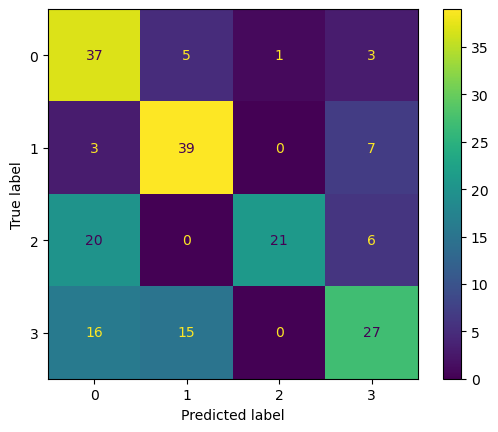

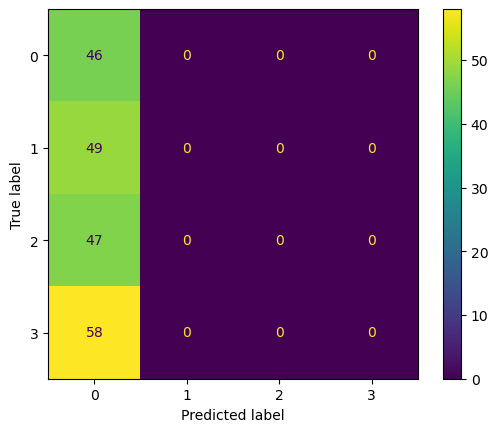

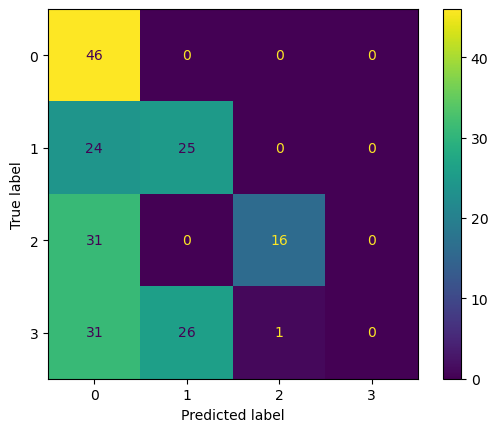

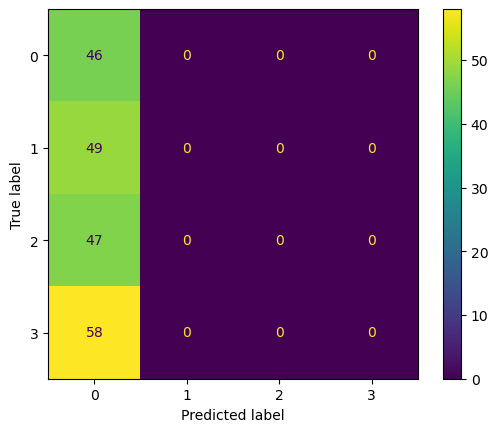

In [30]:
A = ConfusionMatrixDisplay.from_predictions(y_test , pred_l_svd)
plt.show()
B = ConfusionMatrixDisplay.from_predictions(y_test , pred_sig_svd)
plt.show()
C = ConfusionMatrixDisplay.from_predictions(y_test , pred_poly_svd)
plt.show()
D = ConfusionMatrixDisplay.from_predictions(y_test , pred_rbf_svd)

In [31]:
print(classification_report(y_test , pred_l_svd))
print(classification_report(y_test , pred_sig_svd))

              precision    recall  f1-score   support

           0       0.49      0.80      0.61        46
           1       0.66      0.80      0.72        49
           2       0.95      0.45      0.61        47
           3       0.63      0.47      0.53        58

    accuracy                           0.62       200
   macro avg       0.68      0.63      0.62       200
weighted avg       0.68      0.62      0.61       200

              precision    recall  f1-score   support

           0       0.23      1.00      0.37        46
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.09       200
weighted avg       0.05      0.23      0.09       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print(classification_report(y_test , pred_poly_svd))
print(classification_report(y_test , pred_rbf_svd))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        46
           1       0.49      0.51      0.50        49
           2       0.94      0.34      0.50        47
           3       0.00      0.00      0.00        58

    accuracy                           0.43       200
   macro avg       0.44      0.46      0.38       200
weighted avg       0.42      0.43      0.36       200

              precision    recall  f1-score   support

           0       0.23      1.00      0.37        46
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.09       200
weighted avg       0.05      0.23      0.09       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_

## MLP Classifier

In [53]:
from sklearn.neural_network import MLPClassifier

### using PCA transformed data

In [74]:

x_train , x_test , y_train , y_test = train_test_split(x_3 , Y , shuffle=True , random_state=1 )
x_train = np.reshape(x_train , (len(x_train), -1))
x_test = np.reshape(x_test , (len(x_test) , -1))

In [68]:
clf = MLPClassifier((1 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA = clf.predict(x_test)
print(clf.score(x_train , y_train))

0.25666666666666665


In [56]:
clf = MLPClassifier((1 , 300) , activation='logistic' , solver='adam')
clf.fit(x_train , y_train)
pred_log_PCA = clf.predict(x_test)
print(clf.score(x_train , y_train))

0.25166666666666665


In [57]:
clf = MLPClassifier((1 , 300) , activation='tanh' , solver='adam')
clf.fit(x_train , y_train)
pred_tan_PCA = clf.predict(x_test)
print(clf.score(x_train , y_train))

0.255


In [58]:
clf = MLPClassifier((1 , 300) , activation='identity' , solver='adam')
clf.fit(x_train , y_train)
pred_id_PCA = clf.predict(x_test)
print(clf.score(x_train , y_train))

0.43666666666666665


In [69]:
print(classification_report(y_test , pred_relu_PCA))
print(classification_report(y_test , pred_log_PCA))

              precision    recall  f1-score   support

           0       0.23      1.00      0.37        46
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.09       200
weighted avg       0.05      0.23      0.09       200

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.24      1.00      0.39        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.24       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.06      0.24      0.10       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_

In [60]:
print(classification_report(y_test , pred_tan_PCA))
print(classification_report(y_test , pred_id_PCA))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        49
           2       0.23      1.00      0.38        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.06      0.23      0.09       200

              precision    recall  f1-score   support

           0       0.39      0.43      0.41        46
           1       0.33      0.61      0.43        49
           2       0.62      0.77      0.69        47
           3       0.00      0.00      0.00        58

    accuracy                           0.43       200
   macro avg       0.34      0.45      0.38       200
weighted avg       0.32      0.43      0.36       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_

### using relu as main activation

In [75]:
clf = MLPClassifier((2 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA_2 = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred_relu_PCA_2))

0.25666666666666665
              precision    recall  f1-score   support

           0       0.23      1.00      0.37        46
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.09       200
weighted avg       0.05      0.23      0.09       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
clf = MLPClassifier((3 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA_2 = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred_relu_PCA_2))

0.25666666666666665
              precision    recall  f1-score   support

           0       0.23      1.00      0.37        46
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        58

    accuracy                           0.23       200
   macro avg       0.06      0.25      0.09       200
weighted avg       0.05      0.23      0.09       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
clf = MLPClassifier((4 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA_2 = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred_relu_PCA_2))

0.47833333333333333
              precision    recall  f1-score   support

           0       0.47      0.39      0.43        46
           1       0.36      0.76      0.48        49
           2       0.62      0.77      0.69        47
           3       0.00      0.00      0.00        58

    accuracy                           0.46       200
   macro avg       0.36      0.48      0.40       200
weighted avg       0.34      0.46      0.38       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
clf = MLPClassifier((5 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA_2 = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred_relu_PCA_2))

0.3466666666666667
              precision    recall  f1-score   support

           0       0.20      0.24      0.22        46
           1       0.37      1.00      0.54        49
           2       0.30      0.06      0.11        47
           3       0.00      0.00      0.00        58

    accuracy                           0.32       200
   macro avg       0.22      0.33      0.21       200
weighted avg       0.21      0.32      0.21       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
clf = MLPClassifier((6 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA_2 = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred_relu_PCA_2))

0.4216666666666667
              precision    recall  f1-score   support

           0       0.43      0.43      0.43        46
           1       0.33      0.57      0.42        49
           2       0.52      0.77      0.62        47
           3       0.00      0.00      0.00        58

    accuracy                           0.42       200
   macro avg       0.32      0.44      0.37       200
weighted avg       0.30      0.42      0.35       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
x_train , x_test , y_train , y_test = train_test_split(x_1 , Y , shuffle=True , random_state=1 )
x_train = np.reshape(x_train , (len(x_train), -1))
x_test = np.reshape(x_test , (len(x_test) , -1))

In [97]:
clf = MLPClassifier((6 , 300) , activation='relu' , solver='adam')
clf.fit(x_train , y_train)
pred_relu_PCA_2 = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred_relu_PCA_2))

0.9183333333333333
              precision    recall  f1-score   support

           0       0.83      0.52      0.64        46
           1       0.79      0.98      0.87        49
           2       0.92      1.00      0.96        47
           3       0.81      0.83      0.82        58

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.82       200
weighted avg       0.84      0.83      0.82       200



/Users/ehsan_frtn/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Random Forest classifier

### ON PCA data

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
clf = RandomForestClassifier(max_depth=1 , criterion='entropy')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=1 , criterion='gini')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=1 , criterion='log_loss')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

0.5133333333333333
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        46
           1       0.49      0.94      0.64        49
           2       0.49      0.98      0.65        47
           3       0.90      0.16      0.26        58

    accuracy                           0.51       200
   macro avg       0.59      0.52      0.40       200
weighted avg       0.61      0.51      0.40       200

0.5716666666666667
              precision    recall  f1-score   support

           0       0.57      0.09      0.15        46
           1       0.49      0.96      0.65        49
           2       0.57      0.98      0.72        47
           3       0.72      0.22      0.34        58

    accuracy                           0.55       200
   macro avg       0.59      0.56      0.47       200
weighted avg       0.60      0.55      0.46       200

0.5333333333333333
              precision    recall  f1-score   support

           0      

In [100]:
clf = RandomForestClassifier(max_depth=2 , criterion='entropy')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=2 , criterion='gini')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=2 , criterion='log_loss')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

0.675
              precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.64      1.00      0.78        49
           2       0.64      0.98      0.77        47
           3       0.94      0.52      0.67        58

    accuracy                           0.69       200
   macro avg       0.71      0.69      0.65       200
weighted avg       0.72      0.69      0.65       200

0.6983333333333334
              precision    recall  f1-score   support

           0       0.78      0.15      0.25        46
           1       0.68      1.00      0.81        49
           2       0.63      0.96      0.76        47
           3       0.79      0.66      0.72        58

    accuracy                           0.69       200
   macro avg       0.72      0.69      0.64       200
weighted avg       0.72      0.69      0.64       200

0.68
              precision    recall  f1-score   support

           0       0.68      0.28      0.40  

In [101]:
clf = RandomForestClassifier(max_depth=3 , criterion='entropy')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=3 , criterion='gini')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=3 , criterion='log_loss')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

0.8116666666666666
              precision    recall  f1-score   support

           0       0.79      0.67      0.73        46
           1       0.77      0.98      0.86        49
           2       0.79      0.98      0.88        47
           3       0.90      0.64      0.75        58

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.80       200
weighted avg       0.82      0.81      0.80       200

0.8133333333333334
              precision    recall  f1-score   support

           0       0.72      0.46      0.56        46
           1       0.79      0.98      0.87        49
           2       0.75      0.96      0.84        47
           3       0.84      0.72      0.78        58

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.76       200
weighted avg       0.78      0.78      0.77       200

0.7966666666666666
              precision    recall  f1-score   support

           0      

In [102]:
clf = RandomForestClassifier(max_depth=3 , criterion='entropy')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=3 , criterion='gini')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

clf = RandomForestClassifier(max_depth=3 , criterion='log_loss')
clf.fit(x_train , y_train)
pred = clf.predict(x_test)
print(clf.score(x_train , y_train))
print(classification_report(y_test , pred))

0.8116666666666666
              precision    recall  f1-score   support

           0       0.75      0.52      0.62        46
           1       0.77      0.96      0.85        49
           2       0.73      0.98      0.84        47
           3       0.89      0.67      0.76        58

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.79      0.78      0.77       200

0.79
              precision    recall  f1-score   support

           0       0.76      0.48      0.59        46
           1       0.76      0.98      0.86        49
           2       0.78      0.96      0.86        47
           3       0.82      0.71      0.76        58

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200

0.8083333333333333
              precision    recall  f1-score   support

           0       0.75      0.5

In [103]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(x_train , y_train)
print(clf.score(x_train , y_train))
pred = clf.predict(x_test)
print(classification_report(y_test , pred))

0.45166666666666666
              precision    recall  f1-score   support

           0       0.42      0.11      0.17        46
           1       0.62      0.51      0.56        49
           2       0.39      1.00      0.56        47
           3       0.70      0.33      0.45        58

    accuracy                           0.48       200
   macro avg       0.53      0.49      0.44       200
weighted avg       0.54      0.48      0.44       200



In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay
clf = LinearDiscriminantAnalysis('svd')
clf.fit(x_train , y_train)
print(clf.score(x_train , y_train))
pred = clf.predict(x_test)
print(classification_report(y_test , pred))

0.7883333333333333
              precision    recall  f1-score   support

           0       0.33      0.30      0.32        46
           1       0.57      0.59      0.58        49
           2       0.46      0.55      0.50        47
           3       0.57      0.50      0.53        58

    accuracy                           0.49       200
   macro avg       0.48      0.49      0.48       200
weighted avg       0.49      0.49      0.49       200



In [105]:
clf = LinearDiscriminantAnalysis('lsqr')
clf.fit(x_train , y_train)
print(clf.score(x_train , y_train))
pred = clf.predict(x_test)
print(classification_report(y_test , pred))

0.8866666666666667
              precision    recall  f1-score   support

           0       0.91      0.67      0.78        46
           1       0.83      0.92      0.87        49
           2       0.88      0.98      0.93        47
           3       0.85      0.88      0.86        58

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200

